In [1]:
%load_ext autoreload
%autoreload

In [2]:
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt

import problems
import lib

from timing import smooth_time

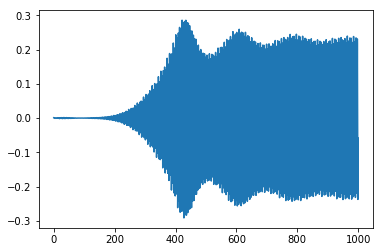

In [7]:
# Plot theta over t

l = 6

iv = np.matrix([
    [0],
    [0],
    [0.001],
    [0]
])

# With RK4/5 variable step size
results = lib.variable_euler(problems.tacoma(W=80, l=l), t=1000, iv=(0, iv), tolerance=1e-4)

# With trapezoid method
# results = lib.euler(problems.tacoma(W=80, l=l), h=0.1, t=1000, iv=(0, iv), method=lib.euler_trapezoid)

def cast():
    for result in results:
        yield [result['t'], result['w'][2, 0]]

lib.plot_gen(cast(), x_keys=(0,), y_keys=(1,))
plt.show()

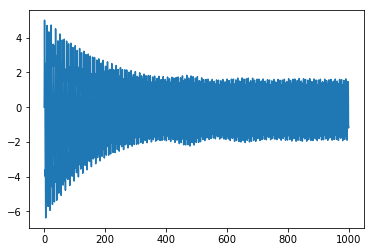

In [7]:
# Plot y over t

l = 6

iv = np.matrix([
    [0],
    [0],
    [0.001],
    [0]
])

# With RK4/5 variable step size
results = lib.variable_euler(problems.tacoma(W=80, l=l), t=1000, iv=(0, iv), tolerance=1e-8)

# With trapezoid method
# results = lib.euler(problems.tacoma(W=80, l=l), h=0.1, t=1000, iv=(0, iv), method=lib.euler_trapezoid)

def cast():
    for result in results:
        yield [result['t'], result['w'][0, 0]]

lib.plot_gen(cast(), x_keys=(0,), y_keys=(1,))
plt.show()

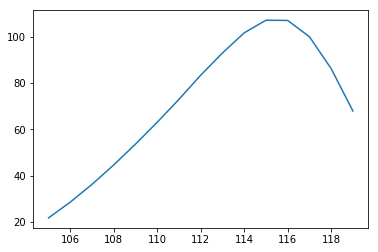

In [8]:
# Plot maximum magnification error over W

l = 6

initial_theta = 0.001

iv = np.matrix([
    [0],
    [0],
    [initial_theta],
    [0]
])


def reduce(W):
    def r(acc, result):
        max_theta = max(acc[1], np.abs(result['w'][2, 0]))
        
        return [W, max_theta, max_theta / initial_theta]
    
    return r, [W, 0, 0]

# f = problems.tacoma_over_w(l, 1000, iv, 1e-8, reduce, d=0.01)
g = problems.tacoma_over_w(l, 1000, iv, 1e-8, reduce, d=0.0224112269482)

ws = np.arange(105, 120, 1)

lib.plot_gen((g(w) for w in ws), x_keys=(0,), y_keys=(2,))
plt.show()

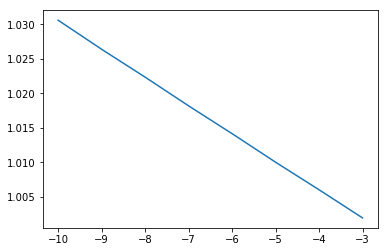

In [13]:
# Plot 
l = 6

iv = np.matrix([
    [0],
    [0],
    [1e-3],
    [0]
])


def reduce(W):
    def r(max_so_far, result):
        return max(max_so_far, np.abs(result['w'][2, 0]))

    return r, 0

max_theta = problems.tacoma_over_w(l, 1000, iv, 1e-10, reduce)
f = lambda x: [x, max_theta(x) / iv[2, 0]]

ws = range(-10, -2)

lib.plot_gen((f(w) for w in ws), x_keys=[0], y_keys=[1])
plt.show()